## **Lab | Customer Analysis Final Round**

## 01 - **Problem (case study)**
- Data Description.
- Goal.

The objective of this data is to understand customer demographics and buying behavior.

The goal is to clean the data as much as possible to create a good model prediction of the label 'Total Claim Amount'

## 02 - **Getting Data**
- Read the .csv file.

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('marketing_customer_analysis.csv')

### 03 - **Cleaning/Wrangling/EDA**

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.


**Change headers names.**

In [40]:
column_names = data.columns
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [41]:
data = data.rename(columns={'EmploymentStatus':'Employment Status'})

**Deal with NaN values.**

In [42]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

**Categorical Features.**
**Numerical Features.**

In [43]:
import numpy as np

In [44]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [45]:
data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [46]:
data.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [47]:
numerical = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)

In [48]:
summary = data
summary['Total Claim Amount'] = list(map(lambda x: round(x,2), summary['Total Claim Amount']))
summary

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


**Exploratory**

- Example 1: Show a plot of the response rate by the sales channel.¶


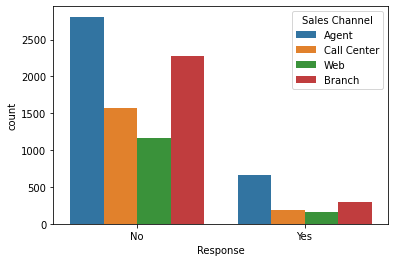

In [49]:


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ax2 = sns.countplot(x='Response', data=data, hue='Sales Channel')

- Example 2: Show a plot of the response rate by income.

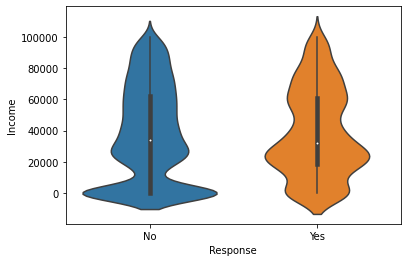

In [50]:
sns.violinplot(x= 'Response',y='Income', data=data)

### **04 - Processing Data**
- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.


**Dealing with outliers**

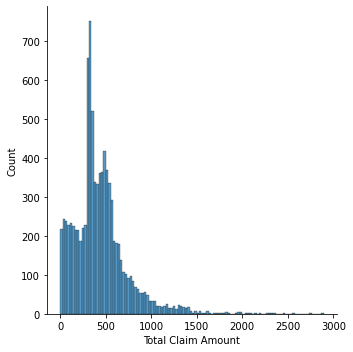

In [51]:
sns.displot(data['Total Claim Amount'])
plt.show()

In [109]:
iqr1 = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 1.5*iqr1
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 1.5*iqr1
numerical = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)]


**Normalization**

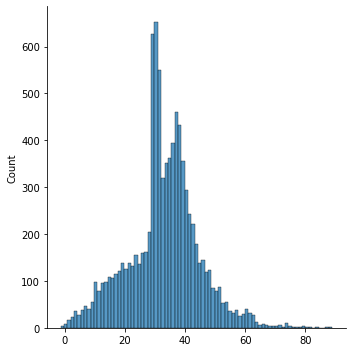

In [52]:
from scipy import stats
xt, lmbda = stats.boxcox(data['Total Claim Amount'])
sns.displot(xt)
plt.show()

**Encoding categorical variables**

In [53]:
numerical = data.select_dtypes(include=np.number)
categorical = data.select_dtypes(include=np.object)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.81
1,6979.535903,0,94,13,42,0,8,1131.46
2,12887.431650,48767,108,18,38,0,2,566.47
3,7645.861827,0,106,18,65,0,7,529.88
4,2813.692575,43836,73,12,44,0,1,138.13


In [54]:
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'Employment Status', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [55]:
reduced_categorical = categorical[['Coverage']]

reduced_categorical.head()

,Coverage
0,Basic
1,Extended
2,Premium
3,Basic
4,Basic


In [56]:
reduced_categorical.value_counts()

Coverage
Basic       5568
Extended    2742
Premium      824
dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder().fit(reduced_categorical)

pd.DataFrame(encoder.transform(reduced_categorical).toarray(),columns=encoder.categories_)

,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
9129,1.0,0.0,0.0
9130,0.0,1.0,0.0
9131,0.0,1.0,0.0
9132,0.0,1.0,0.0


In [58]:
one_hot_encoded = pd.DataFrame(encoder.transform(reduced_categorical).toarray(),columns=encoder.categories_).drop(['Premium'],axis=1)
one_hot_encoded.head()

,Basic,Extended
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit(reduced_categorical).transform(reduced_categorical)
label_encoded = pd.DataFrame(label_encoded,columns=reduced_categorical.columns)
print(label_encoded)
label_encoded.value_counts()

      Coverage
0            0
1            1
2            2
3            0
4            0
...        ...
9129         0
9130         1
9131         1
9132         1
9133         1

[9134 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coverage
0           5568
1           2742
2            824
dtype: int64

- Normalize with MinMaxScale

In [63]:

from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer = MinMaxtransformer.fit(numerical)

In [65]:
num_normalized = pd.DataFrame(MinMaxtransformer.transform(numerical), columns=numerical.columns)
num_normalized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132973
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391049
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195763
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183116
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047709


- Checking correlations to drop less correlated values with y

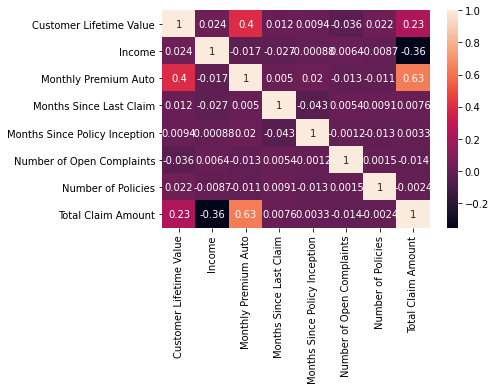

In [69]:
correlations_matrix = num_normalized.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [70]:
reduced_numerical = num_normalized.drop(['Number of Policies','Months Since Policy Inception','Months Since Last Claim'],axis=1)
reduced_numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Number of Open Complaints', 'Total Claim Amount'],
      dtype='object')

**Splitting into train set and test set**

In [91]:
y = numerical['Total Claim Amount']
X = reduced_numerical.drop(['Total Claim Amount'],axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints
0,0.010629,0.562847,0.033755,0.0
1,0.062406,0.000000,0.139241,0.0
2,0.134960,0.487763,0.198312,0.0
3,0.070589,0.000000,0.189873,0.0
4,0.011245,0.438443,0.050633,0.0
...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.0
9130,0.014719,0.216081,0.075949,0.0
9131,0.076951,0.000000,0.101266,0.6
9132,0.069098,0.219452,0.147679,0.0


In [92]:
X = pd.concat([X,one_hot_encoded],axis=1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,"(Basic,)","(Extended,)"
0,0.010629,0.562847,0.033755,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.0,1.0,0.0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=100)

In [94]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,"(Basic,)","(Extended,)"
4226,0.050018,0.251298,0.084388,0.2,0.0,1.0
6100,0.035634,0.000000,0.016878,0.0,1.0,0.0
3414,0.020165,0.000000,0.160338,0.0,0.0,1.0
1540,0.061085,0.000000,0.569620,0.4,0.0,0.0
1367,0.075245,0.387094,0.168776,0.6,1.0,0.0


In [95]:
y_train.head()

4226     583.20
6100     312.00
3414    1158.86
1540     940.80
1367     253.36
Name: Total Claim Amount, dtype: float64

In [96]:
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,"(Basic,)","(Extended,)"
7175,0.039478,0.565978,0.016878,0.2,1.0,0.0
7255,0.036650,0.212400,0.261603,0.0,0.0,1.0
2846,0.044100,0.338874,0.029536,0.0,1.0,0.0
1211,0.022135,0.175603,0.147679,0.0,0.0,1.0
4294,0.083287,0.527270,0.202532,0.0,0.0,0.0


In [97]:
y_test.head()

7175    312.00
7255    131.26
2846     65.66
1211    666.72
4294     60.15
Name: Total Claim Amount, dtype: float64

## **06 - Model Validation**
- R2.
- MSE.
- RMSE.
- MAE.

In [98]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X,y)

model = model.fit(X_train, y_train)

In [99]:
model.score(X_train, y_train)

0.5400319001104095

In [100]:
model.predict(X_test)

array([226.64062312, 648.40717199, 318.53734647, ..., 278.83288222,
       341.3669396 , 466.13847814])

**R2**

In [108]:
from sklearn.metrics import r2_score

r2_score(y_test,model.predict(X_test))
predicted = model.predict(X_test)

r2 = r2_score(y_test, predicted)

r2

0.4961325637521704

The model is mediocre at predicting the Total Claim Amount of the customers from my data. It should be closer to 1 than to 0 to be at least more than mediocre to predict the y value.

**MSE**

In [107]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
print(mse)

41665.6586746821


**RMSE**

In [103]:
# RMSE

from sklearn import linear_model
import math

rmse = math.sqrt(mse)
print(rmse)

204.12167615097152



The average mistakes from the prediction model is expected to be 204.12$, which is a huge average error. Considering the average error value, we can say that the model is not good enough to make predictions.

**MAE**

In [106]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predicted)
print('MAE: %.3f' % mae)

MAE: 146.080


The performance of the model when making predictions on new data has a mean absolute error of about 146 dollars.